In [2]:
from modules.compare_agent_module import build_compare_graph
from langchain_openai import ChatOpenAI

# 1. LangGraph 빌드
graph = build_compare_graph()

# 2. 초기 상태 정의 (prompt 포함)
state = {
    "question": "비타민 D 많이 먹어도 되나요?",
    "social_knowledge": "",
    "latest_docs": [],
    "final_answer": "",
    "prompt": None  # 최종 프롬프트가 여기에 담김
}

# 3. 그래프 실행
state = graph.invoke(state)

# 4. 프롬프트가 제대로 만들어졌는지 확인
if not state.get("prompt"):
    raise ValueError("프롬프트가 생성되지 않았습니다. compare_knowledge() 함수에서 state['prompt']가 설정되어야 합니다.")

# 5. 스트리밍 출력
print("\n📢 LLM 응답:")
model = ChatOpenAI(model="gpt-4.1", streaming=True)

full_response = ""
for chunk in model.stream(state["prompt"]):
    token = chunk.content
    print(token, end="", flush=True)
    full_response += token

# 6. 최종 응답 저장 (선택)
state["final_answer"] = full_response


질문 분석: 비타민 D 많이 먹어도 되나요?
사회통념 지식 검색 중...
최신 논문 검색 중...
지식 비교 중...

📢 LLM 응답:
안녕하세요! “비타민 D를 많이 먹어도 괜찮나요?”라는 질문에 대해 답변해 드릴게요.

먼저, 사회통념부터 간단히 정리해볼게요.  
많은 사람들이 “비타민 D는 결핍이 더 문제지, 많이 먹어도 별 문제 없다” 혹은 “비타민 D는 지용성이라 너무 많이 먹으면 부작용이 있을 수 있다”는 정도로만 알고 계세요. 실제로 비타민 D는 면역력, 뼈 건강 등에 좋다고 해서 겨울철이나 실내 활동이 많은 분들이 건강을 위해 추가로 많이 복용하는 경우가 많죠.

그런데, 최신 논문이나 최근 연구들은 이 사회통념에서 한 발 더 나아간 내용을 보여주고 있어요.  
먼저, 추천 섭취량(보통 성인 기준 하루 600~800IU, 노인 800~1000IU)보다 훨씬 많은 용량, 즉 하루 4,000IU를 지속적으로 복용하는 것이 일부 환자에게 유익할 수 있다는 연구도 있지만, 일반 성인에게서 장기간 고용량을 섭취할 경우에는 혈중 칼슘 농도가 상승하거나 신장에 무리가 올 수 있다는 부작용 가능성이 실제로 보고되고 있어요. 어떤 연구들은 “비타민 D 과잉 복용이 오히려 사망률 증가나 골절 위험 증가와 연관될 수 있다”고 경고합니다.

즉, 사회통념과 달리 “많이 먹어도 무해하다”는 주장은 근거가 부족하며, ‘필요량 이상’ 복용은 오히려 해로울 수 있다는 게 최신 논문의 결론입니다. 특히 비타민 D는 수용성(쉽게 배출) 비타민이 아니고, 체내에 축적되기 쉽기 때문에 더욱 주의해야 해요.

정리하자면,  
**사회통념:** 결핍이 더 걱정이고, 조금 많이 먹어도 괜찮다  
**최신 연구:** 과도하게 섭취하면 오히려 건강에 해로울 수 있으니, 전문가 상담을 통해 개인별 필요량을 정확히 조절해야 한다

결론적으로 “비타민 D, 많이 먹어도 될까요?”라는 질문에 대한 최신 과학의 답은,  
본인이 결핍인지 아닌지, 현재 건강 상태, 그리고 다른 약물과의 상호작용까지

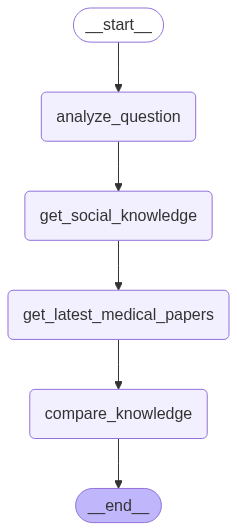

In [4]:
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())